In [1]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv("resultados/pearson_corr.csv", skiprows=1)


In [2]:
df.columns = ["tipo", "pearson"]


In [3]:
df['Algoritmo'] = df['tipo'].str.replace('\d+', '')




C:\Users\mcso\AppData\Local\Temp/ipykernel_8724/2677507307.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Algoritmo'] = df['tipo'].str.replace('\d+', '')


In [4]:
# df[df['Algoritmo']=='bow']['Algoritmo'] = 'Bow' 

df['Algoritmo'].replace('bow','BoW',inplace=True)
df['Algoritmo'].replace('tf_idf','TF-IDF',inplace=True)
df['Algoritmo'].replace('bert_base_mean','BERT base (mean)',inplace=True)
df['Algoritmo'].replace('bert_base_max','BERT base (max)',inplace=True)
df['Algoritmo'].replace('wordvec','word2vec',inplace=True)
df['Algoritmo'].replace('docvec','doc2vec',inplace=True)
df['Algoritmo'].replace('bert_miniLM','BERT miniLM6',inplace=True)

In [5]:
df["abs_pearson"] = df["pearson"]*(-1)

In [6]:
df["pipeline"] = df["tipo"].str[-1:]


In [7]:
df.head()

,tipo,pearson,Algoritmo,abs_pearson,pipeline
0,bow0,-0.435595,BoW,0.435595,0
1,bow1,-0.428670,BoW,0.428670,1
2,bow2,-0.761311,BoW,0.761311,2
3,bow3,-0.454058,BoW,0.454058,3
4,bow4,-0.766767,BoW,0.766767,4


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")



[Text(0.5, 0, 'Corr. Pearson (abs.)'), Text(0, 0.5, 'Modelo')]

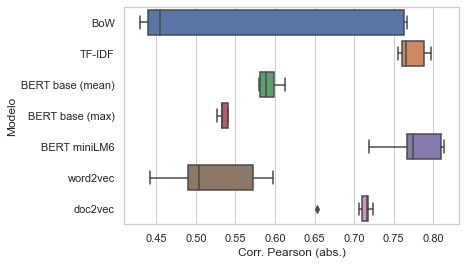

In [9]:
ax2 = sns.boxplot(x=df["abs_pearson"], y = df["Algoritmo"])
ax2.set(xlabel='Corr. Pearson (abs.)', ylabel='Modelo')


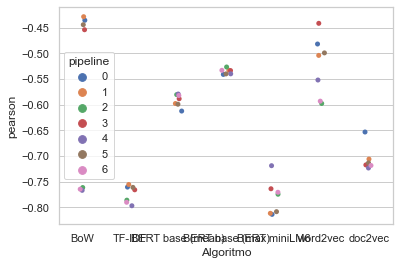

In [10]:
ax = sns.stripplot(x="Algoritmo", y="pearson", hue="pipeline", data=df)

In [11]:
df_time = pd.read_csv("resultados/times.csv")
df_time.columns = ["tipo", "runtime"]
df_time['Algo'] = df_time['tipo'].str.replace('\d+', '')
df_time["runtime-rounded"] = df_time["runtime"].round(2)


C:\Users\mcso\AppData\Local\Temp/ipykernel_8724/985077362.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_time['Algo'] = df_time['tipo'].str.replace('\d+', '')


In [12]:
df_time['Algo'].replace('bow','BoW',inplace=True)
df_time['Algo'].replace('tf_idf','TF-IDF',inplace=True)
df_time['Algo'].replace('bert_base_mean','BERT base (mean)',inplace=True)
df_time['Algo'].replace('bert_base_max','BERT base (max)',inplace=True)
df_time['Algo'].replace('wordvec','word2vec',inplace=True)
df_time['Algo'].replace('docvec','doc2vec',inplace=True)
df_time['Algo'].replace('bert_miniLM','BERT miniLM6',inplace=True)

[Text(0.5, 0, 'Tempo de execução (s)'), Text(0, 0.5, 'Modelo')]

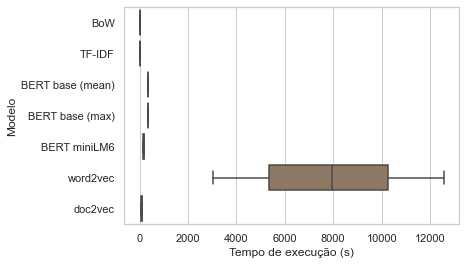

In [13]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x= df_time["runtime"], y = df_time["Algo"])
ax.set(xlabel='Tempo de execução (s)', ylabel='Modelo')

[Text(0.5, 0, 'Tempo de execução (s)'), Text(0, 0.5, 'Modelo')]

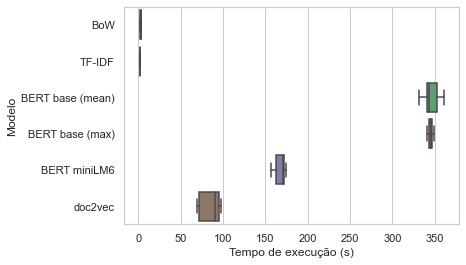

In [14]:
df_time2 = df_time[df_time["Algo"] != "word2vec"]
ax2 = sns.boxplot(x= df_time2["runtime"], y = df_time2["Algo"])
ax2.set(xlabel='Tempo de execução (s)', ylabel='Modelo')

In [15]:
df_corr_time = df.merge(df_time[['tipo', 'runtime']], on='tipo')

In [16]:
df_corr_time.head()

,tipo,pearson,Algoritmo,abs_pearson,pipeline,runtime
0,bow0,-0.435595,BoW,0.435595,0,2.676566
1,bow1,-0.428670,BoW,0.428670,1,2.580221
2,bow2,-0.761311,BoW,0.761311,2,2.174572
3,bow3,-0.454058,BoW,0.454058,3,2.624142
4,bow4,-0.766767,BoW,0.766767,4,2.156550


[Text(0.5, 0, 'Corr. Pearson (abs.)'), Text(0, 0.5, 'Tempo de execução (s)')]

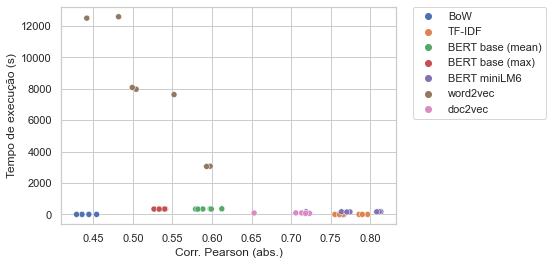

In [17]:
ax = sns.scatterplot(data=df_corr_time, x="abs_pearson", y="runtime", hue="Algoritmo")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Corr. Pearson (abs.)', ylabel='Tempo de execução (s)')

No handles with labels found to put in legend.


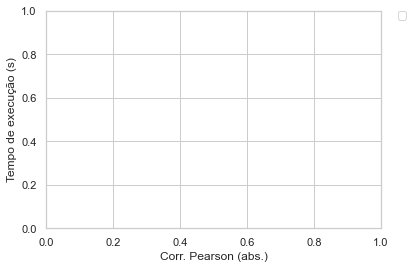

In [24]:
df_corr_time2 = df_corr_time[df_corr_time["Algoritmo"] != "word2vec"]
ax = sns.scatterplot(data=df_corr_time2, x="abs_pearson", y="runtime", hue="Algoritmo", marker = "S")
ax.set(xlabel='Corr. Pearson (abs.)', ylabel='Tempo de execução (s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
